![Logo Universidad Galileo](assets/Logo_Universidad_Galileo.png)

# Environment setup

In [23]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [25]:
from constants import Constants

# Loading data

In [26]:
dataframePart1 = pd.read_parquet(Constants.info_part1_path)
dataframePart2 = pd.read_parquet(Constants.info_part2_path)

## Inspecting if there is a difference in files

In [27]:
dataframePart1

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,NumProfiles,TotalChargesCategory,MonthlyChargesChange,ViewingHoursVariation,SubscriptionPaymentInteraction,AccountViewingInteraction,NetworkLatency,BandwidthUsage,EngagementScore,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,3,Low,Decreased,0.853802,Premium-Mailed check,735.162078,1521.525778,-6269.511593,25.503069,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,2,Low,Decreased,0.868619,Basic-Credit card,1849.682366,887.208761,4237.539156,10.250613,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,3,Medium,No Change,-0.057224,Basic-Mailed check,539.846688,1417.106269,23081.200144,23.001931,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,3,Low,Decreased,0.880848,Basic-Electronic check,894.732438,499.133801,4612.778084,52.614266,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,4,Medium,Increased,-1.115051,Premium-Electronic check,1144.753650,1310.290739,2116.163308,18.146301,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121888,110,5.222484,574.473204,Basic,Bank transfer,No,Both,Yes,Tablet,20.805085,...,1,Low,Increased,0.428816,Basic-Bank transfer,2288.559393,-1260.979422,-4532.372414,21.656638,0
121889,25,16.654703,416.367566,Standard,Credit card,No,Both,No,Tablet,12.620406,...,2,Low,Decreased,0.438821,Standard-Credit card,315.510144,416.932518,2112.889117,23.010134,0
121890,25,15.708324,392.708090,Basic,Credit card,Yes,TV Shows,No,Mobile,10.575187,...,3,Low,No Change,-0.129349,Basic-Credit card,264.379675,520.236064,-13900.273813,11.373751,1
121891,1,13.035456,13.035456,Basic,Bank transfer,Yes,Movies,No,TV,9.391702,...,4,Low,Increased,-0.116135,Basic-Bank transfer,9.391702,400.547408,11323.727109,65.018624,0


In [28]:
dataframePart2

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,NumProfiles,TotalChargesCategory,MonthlyChargesChange,ViewingHoursVariation,SubscriptionPaymentInteraction,AccountViewingInteraction,NetworkLatency,BandwidthUsage,EngagementScore,Churn
0,119,6.061857,721.361030,Basic,Credit card,Yes,Movies,No,Tablet,19.818269,...,1,Low,No Change,-0.402658,Basic-Credit card,2358.373997,-477.443486,1237.881755,15.791455,0
1,57,16.297635,928.965223,Standard,Mailed check,No,TV Shows,Yes,Computer,14.439444,...,3,Medium,Increased,-1.848103,Standard-Mailed check,823.048334,253.543900,-7326.243606,47.821783,1
2,48,19.817212,951.226178,Standard,Mailed check,Yes,Movies,Yes,Tablet,13.270830,...,3,Medium,Increased,-0.330016,Standard-Mailed check,636.999839,-131.818739,-12931.413534,56.989866,0
3,82,19.441192,1594.177777,Basic,Electronic check,Yes,Movies,No,Mobile,36.915908,...,1,High,Increased,1.862545,Basic-Electronic check,3027.104454,798.269693,-17958.856397,21.751379,0
4,71,17.199560,1221.168792,Basic,Credit card,Yes,TV Shows,No,TV,21.316214,...,1,Medium,Increased,0.649223,Basic-Credit card,1513.451180,-1168.072346,-5990.916558,28.793683,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121889,77,9.639902,742.272460,Basic,Mailed check,No,Movies,No,Computer,13.502729,...,2,Low,Increased,-1.233777,Basic-Mailed check,1039.710147,-302.272067,-14484.098717,31.876491,0
121890,117,13.049257,1526.763053,Premium,Credit card,No,TV Shows,Yes,TV,24.963291,...,2,Medium,Decreased,0.846692,Premium-Credit card,2920.704989,2685.627533,-8594.860064,23.984183,0
121891,113,14.514569,1640.146267,Premium,Credit card,Yes,TV Shows,No,TV,10.628728,...,3,High,Decreased,-0.909294,Premium-Credit card,1201.046316,508.449869,-9618.256354,70.290613,0
121892,7,18.140555,126.983887,Premium,Bank transfer,Yes,TV Shows,No,TV,30.466782,...,1,Low,Increased,-1.112677,Premium-Bank transfer,213.267477,-857.379848,24324.742519,61.386867,0


## Merging dataframes

In [29]:
allDataDataFrame = pd.concat([dataframePart1, dataframePart2], axis=0)
allDataDataFrame

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,NumProfiles,TotalChargesCategory,MonthlyChargesChange,ViewingHoursVariation,SubscriptionPaymentInteraction,AccountViewingInteraction,NetworkLatency,BandwidthUsage,EngagementScore,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,3,Low,Decreased,0.853802,Premium-Mailed check,735.162078,1521.525778,-6269.511593,25.503069,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,2,Low,Decreased,0.868619,Basic-Credit card,1849.682366,887.208761,4237.539156,10.250613,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,3,Medium,No Change,-0.057224,Basic-Mailed check,539.846688,1417.106269,23081.200144,23.001931,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,3,Low,Decreased,0.880848,Basic-Electronic check,894.732438,499.133801,4612.778084,52.614266,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,4,Medium,Increased,-1.115051,Premium-Electronic check,1144.753650,1310.290739,2116.163308,18.146301,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121889,77,9.639902,742.272460,Basic,Mailed check,No,Movies,No,Computer,13.502729,...,2,Low,Increased,-1.233777,Basic-Mailed check,1039.710147,-302.272067,-14484.098717,31.876491,0
121890,117,13.049257,1526.763053,Premium,Credit card,No,TV Shows,Yes,TV,24.963291,...,2,Medium,Decreased,0.846692,Premium-Credit card,2920.704989,2685.627533,-8594.860064,23.984183,0
121891,113,14.514569,1640.146267,Premium,Credit card,Yes,TV Shows,No,TV,10.628728,...,3,High,Decreased,-0.909294,Premium-Credit card,1201.046316,508.449869,-9618.256354,70.290613,0
121892,7,18.140555,126.983887,Premium,Bank transfer,Yes,TV Shows,No,TV,30.466782,...,1,Low,Increased,-1.112677,Premium-Bank transfer,213.267477,-857.379848,24324.742519,61.386867,0


## Detecting nulls

In [30]:
missing_values = allDataDataFrame.isnull().sum().sort_values()
print("Missing Values: ", missing_values)

Missing Values:  AccountAge                        0
AnnualIncome                      0
Location                          0
EducationLevel                    0
SocialMediaInteractions           0
PersonalizedRecommendations       0
CommentsOnContent                 0
WebsiteVisitsPerWeek              0
Age                               0
OffersDiscounts                   0
TotalChargesCategory              0
MonthlyChargesChange              0
ViewingHoursVariation             0
SubscriptionPaymentInteraction    0
AccountViewingInteraction         0
NetworkLatency                    0
BandwidthUsage                    0
NumProfiles                       0
EngagementScore                   0
CustomerID                        0
ParentalControl                   0
MonthlyCharges                    0
TotalCharges                      0
SubscriptionType                  0
PaymentMethod                     0
PaperlessBilling                  0
ContentType                       0
MultiDevice

In [31]:
allDataDataFrameCopy = allDataDataFrame.copy().drop(columns=['Churn']).drop(columns=['CustomerID'])

allDataDataFrameCopy

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,OffersDiscounts,NumProfiles,TotalChargesCategory,MonthlyChargesChange,ViewingHoursVariation,SubscriptionPaymentInteraction,AccountViewingInteraction,NetworkLatency,BandwidthUsage,EngagementScore
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,4,3,Low,Decreased,0.853802,Premium-Mailed check,735.162078,1521.525778,-6269.511593,25.503069
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,2,2,Low,Decreased,0.868619,Basic-Credit card,1849.682366,887.208761,4237.539156,10.250613
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,0,3,Medium,No Change,-0.057224,Basic-Mailed check,539.846688,1417.106269,23081.200144,23.001931
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,5,3,Low,Decreased,0.880848,Basic-Electronic check,894.732438,499.133801,4612.778084,52.614266
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,7,4,Medium,Increased,-1.115051,Premium-Electronic check,1144.753650,1310.290739,2116.163308,18.146301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121889,77,9.639902,742.272460,Basic,Mailed check,No,Movies,No,Computer,13.502729,...,3,2,Low,Increased,-1.233777,Basic-Mailed check,1039.710147,-302.272067,-14484.098717,31.876491
121890,117,13.049257,1526.763053,Premium,Credit card,No,TV Shows,Yes,TV,24.963291,...,7,2,Medium,Decreased,0.846692,Premium-Credit card,2920.704989,2685.627533,-8594.860064,23.984183
121891,113,14.514569,1640.146267,Premium,Credit card,Yes,TV Shows,No,TV,10.628728,...,5,3,High,Decreased,-0.909294,Premium-Credit card,1201.046316,508.449869,-9618.256354,70.290613
121892,7,18.140555,126.983887,Premium,Bank transfer,Yes,TV Shows,No,TV,30.466782,...,2,1,Low,Increased,-1.112677,Premium-Bank transfer,213.267477,-857.379848,24324.742519,61.386867


In [32]:
allDataDataFrameCopy.select_dtypes(include=['object']).columns

Index(['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType',
       'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender',
       'ParentalControl', 'SubtitlesEnabled', 'Location', 'EducationLevel',
       'MonthlyChargesChange', 'SubscriptionPaymentInteraction'],
      dtype='object')

## Mini script for converting col names into python variables

In [44]:
dec = ''
for col in allDataDataFrame.columns:
    initial: str = col[0].lower()
    dec += f'{initial}{col[1:]}Col = \'{col}\' \n'

print(dec)

accountAgeCol = 'AccountAge' 
monthlyChargesCol = 'MonthlyCharges' 
totalChargesCol = 'TotalCharges' 
subscriptionTypeCol = 'SubscriptionType' 
paymentMethodCol = 'PaymentMethod' 
paperlessBillingCol = 'PaperlessBilling' 
contentTypeCol = 'ContentType' 
multiDeviceAccessCol = 'MultiDeviceAccess' 
deviceRegisteredCol = 'DeviceRegistered' 
viewingHoursPerWeekCol = 'ViewingHoursPerWeek' 
averageViewingDurationCol = 'AverageViewingDuration' 
contentDownloadsPerMonthCol = 'ContentDownloadsPerMonth' 
genrePreferenceCol = 'GenrePreference' 
userRatingCol = 'UserRating' 
supportTicketsPerMonthCol = 'SupportTicketsPerMonth' 
genderCol = 'Gender' 
watchlistSizeCol = 'WatchlistSize' 
parentalControlCol = 'ParentalControl' 
subtitlesEnabledCol = 'SubtitlesEnabled' 
customerIDCol = 'CustomerID' 
ageCol = 'Age' 
annualIncomeCol = 'AnnualIncome' 
locationCol = 'Location' 
educationLevelCol = 'EducationLevel' 
socialMediaInteractionsCol = 'SocialMediaInteractions' 
personalizedRecommendationsCol = 'Pe

In [45]:
accountAgeCol = 'AccountAge' 
monthlyChargesCol = 'MonthlyCharges' 
totalChargesCol = 'TotalCharges' 
subscriptionTypeCol = 'SubscriptionType' 
paymentMethodCol = 'PaymentMethod' 
paperlessBillingCol = 'PaperlessBilling' 
contentTypeCol = 'ContentType' 
multiDeviceAccessCol = 'MultiDeviceAccess' 
deviceRegisteredCol = 'DeviceRegistered' 
viewingHoursPerWeekCol = 'ViewingHoursPerWeek' 
averageViewingDurationCol = 'AverageViewingDuration' 
contentDownloadsPerMonthCol = 'ContentDownloadsPerMonth' 
genrePreferenceCol = 'GenrePreference' 
userRatingCol = 'UserRating' 
supportTicketsPerMonthCol = 'SupportTicketsPerMonth' 
genderCol = 'Gender' 
watchlistSizeCol = 'WatchlistSize' 
parentalControlCol = 'ParentalControl' 
subtitlesEnabledCol = 'SubtitlesEnabled' 
customerIDCol = 'CustomerID' 
ageCol = 'Age' 
annualIncomeCol = 'AnnualIncome' 
locationCol = 'Location' 
educationLevelCol = 'EducationLevel' 
socialMediaInteractionsCol = 'SocialMediaInteractions' 
personalizedRecommendationsCol = 'PersonalizedRecommendations' 
commentsOnContentCol = 'CommentsOnContent' 
websiteVisitsPerWeekCol = 'WebsiteVisitsPerWeek' 
offersDiscountsCol = 'OffersDiscounts' 
numProfilesCol = 'NumProfiles' 
totalChargesCategoryCol = 'TotalChargesCategory' 
monthlyChargesChangeCol = 'MonthlyChargesChange' 
viewingHoursVariationCol = 'ViewingHoursVariation' 
subscriptionPaymentInteractionCol = 'SubscriptionPaymentInteraction' 
accountViewingInteractionCol = 'AccountViewingInteraction' 
networkLatencyCol = 'NetworkLatency' 
bandwidthUsageCol = 'BandwidthUsage' 
engagementScoreCol = 'EngagementScore' 
churnCol = 'Churn' 


In [33]:
for col in allDataDataFrameCopy.select_dtypes(include=['object']).columns:
    print(f"col: {col}: values: f{allDataDataFrameCopy[col].unique()}")

col: SubscriptionType: values: f['Premium' 'Basic' 'Standard']
col: PaymentMethod: values: f['Mailed check' 'Credit card' 'Electronic check' 'Bank transfer']
col: PaperlessBilling: values: f['No' 'Yes']
col: ContentType: values: f['Both' 'Movies' 'TV Shows']
col: MultiDeviceAccess: values: f['No' 'Yes']
col: DeviceRegistered: values: f['Mobile' 'Tablet' 'Computer' 'TV']
col: GenrePreference: values: f['Sci-Fi' 'Action' 'Fantasy' 'Drama' 'Comedy']
col: Gender: values: f['Male' 'Female']
col: ParentalControl: values: f['No' 'Yes']
col: SubtitlesEnabled: values: f['No' 'Yes']
col: Location: values: f['Urban' 'Suburban' 'Rural']
col: EducationLevel: values: f['High School' 'Bachelor' 'PhD' 'Master']
col: MonthlyChargesChange: values: f['Decreased' 'No Change' 'Increased']
col: SubscriptionPaymentInteraction: values: f['Premium-Mailed check' 'Basic-Credit card' 'Basic-Mailed check'
 'Basic-Electronic check' 'Premium-Electronic check'
 'Premium-Bank transfer' 'Standard-Electronic check'
 'St

## Plotting distribution of numerical variables

In [34]:
def plotBoxPlot(data: pd.DataFrame, x: str, col: str):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8,6))
    sns.boxplot(x=x, y=col, data=allDataDataFrame)
    plt.title(f'Relation between Churn and {col}')
    plt.show()

In [35]:
def plotScatterPlot(data: pd.DataFrame, col: str):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Churn', y=col, style='Class', data=data, palette='viridis')
    plt.title(f'Scatter Plot of Churn vs {col} by Class')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.legend(title='Class')
    plt.show()

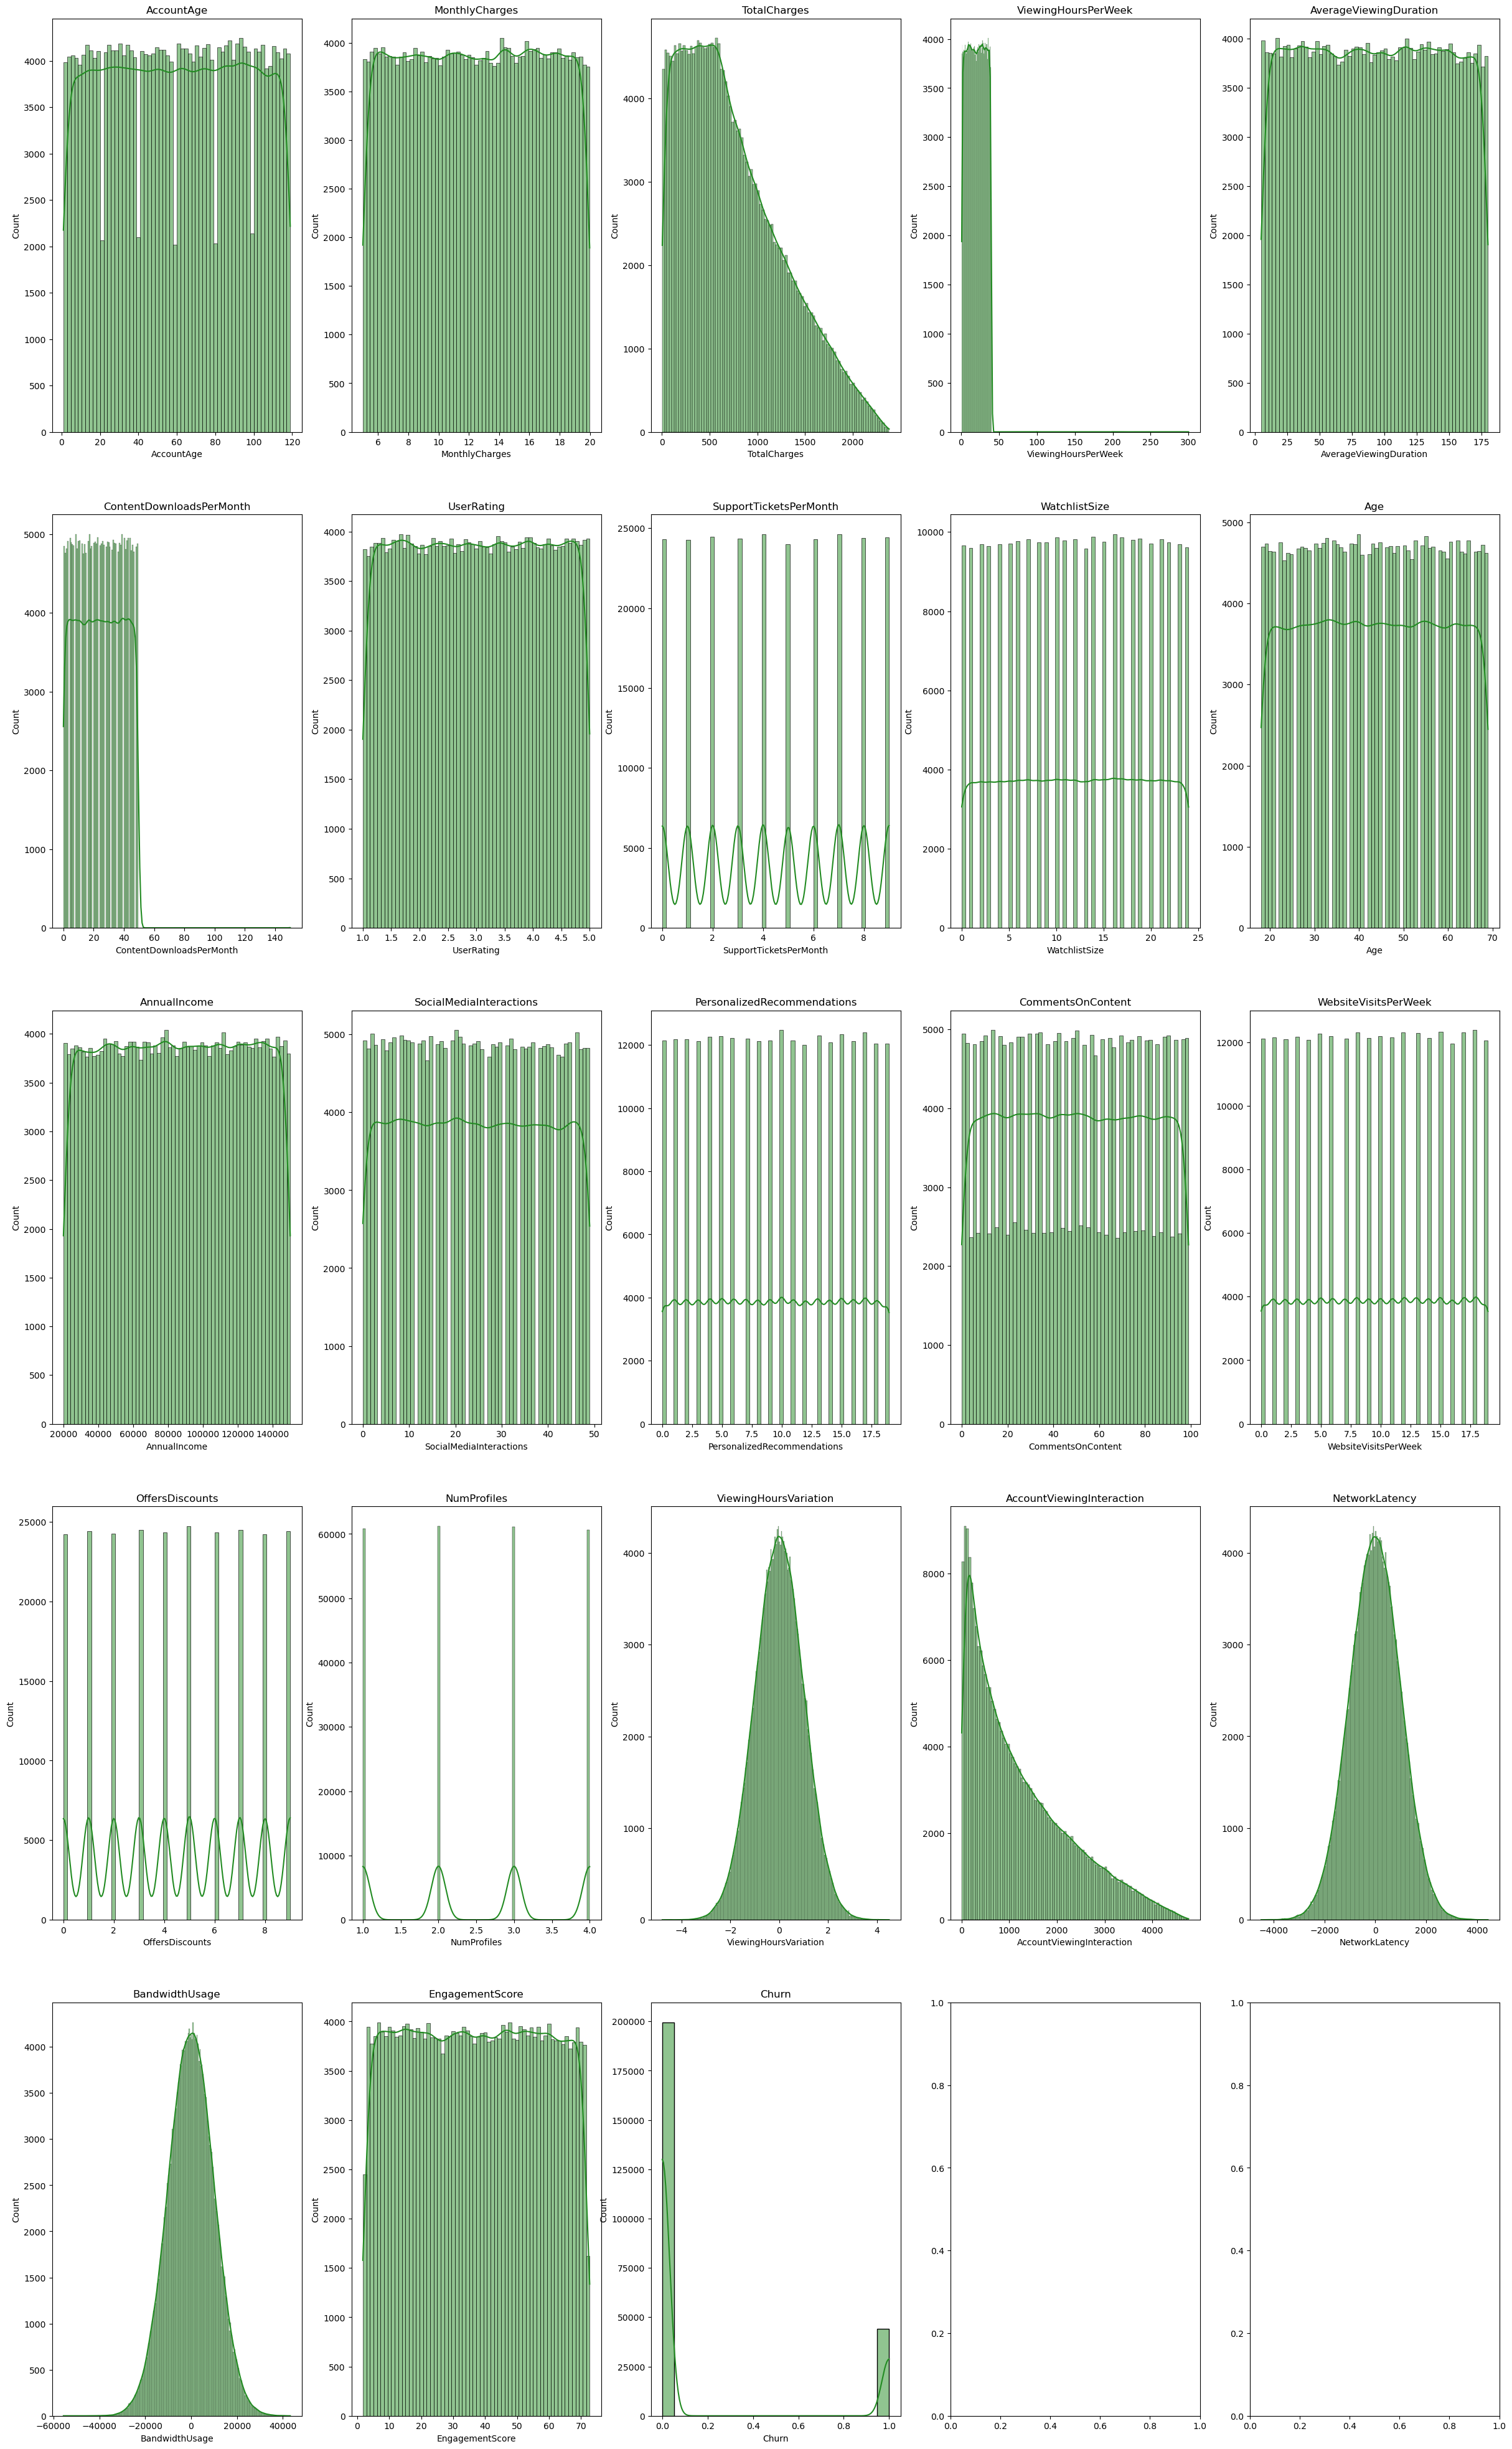

In [39]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

plotDf = allDataDataFrame.select_dtypes(numerics)

fig, axes = plt.subplots(nrows=5, ncols=5)
axes = axes.flatten()
fig.set_size_inches(30, 50)

for ax, col in zip(axes, plotDf.columns):
    sns.histplot(plotDf[col], ax = ax, color='forestgreen', kde=True)
    ax.set_title(col)



## Feature engineering

### Applying one hot encoding

In [61]:
oneHotEncoder = OneHotEncoder(sparse_output=False)
subscriptionTypeEncoded = oneHotEncoder.fit_transform(allDataDataFrame[[subscriptionTypeCol]])

subscriptionTypeDf = pd.DataFrame(subscriptionTypeEncoded, columns= oneHotEncoder.get_feature_names_out([subscriptionTypeCol]))

df_encoded = pd.concat([allDataDataFrameCopy.drop(subscriptionTypeCol, axis=1), subscriptionTypeDf], axis=1).reset_index()


df_encoded

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'